<a href="https://colab.research.google.com/github/Pranavla/2023_layoff/blob/main/Layoff_2023_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
palette = sns.color_palette("rainbow", 8)

# **Importing the dataset**

In [14]:
df = pd.read_csv("/content/layoffs_data.csv")
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Thoughtworks,Chicago,Other,500.0,0.04,2023-03-01 00:00:00,https://techcrunch.com/2023/03/01/thoughtworks...,748.0,Post-IPO,2023-03-02 04:06:16,United States,Unknown
1,iFood,Sao Paulo,Food,355.0,0.06,2023-03-01 00:00:00,https://economia.uol.com.br/noticias/redacao/2...,2100.0,Subsidiary,2023-03-02 04:13:25,Brazil,Unknown
2,Waymo,SF Bay Area,Transportation,209.0,0.08,2023-03-01 00:00:00,https://www.theinformation.com/articles/alphab...,5500.0,Subsidiary,2023-03-02 04:08:34,United States,Unknown
3,PayFit,Paris,HR,200.0,0.20,2023-03-01 00:00:00,https://www.lesechos.fr/start-up/next40-vivate...,495.0,Series E,2023-03-02 04:17:47,France,Unknown
4,Yellow.ai,SF Bay Area,Support,200.0,NaN,2023-03-01 00:00:00,https://inc42.com/buzz/conversational-ai-start...,102.0,Series C,2023-03-02 04:12:23,United States,Unknown


# **Data Preprocessing**

Printing the number of rows and columns

In [15]:
df.shape

(2330, 12)

Let's have a basic understanding of the numbers in the data

In [16]:
df.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,1600.000000,1561.000000,2126.000000
mean,237.951875,0.257084,819.675115
std,773.809369,0.254784,5620.320571
min,3.000000,0.000000,0.000000
25%,36.000000,0.100000,50.000000
50%,79.000000,0.170000,156.000000
75%,175.000000,0.300000,440.250000
max,12000.000000,1.000000,121900.000000


Checking the null values

In [17]:
df.isna().sum()

Company                         0
Location_HQ                     0
Industry                        0
Laid_Off_Count                730
Percentage                    769
Date                            1
Source                          0
Funds_Raised                  204
Stage                           0
Date_Added                      0
Country                         0
List_of_Employees_Laid_Off      1
dtype: int64

Dropping the rows with no layoff count.

In [18]:
df = df[df['Laid_Off_Count'].notna()]

Collecting the year valiue from the data column and making a column for the same.

In [19]:
def get_year(date):
    return date.split("-")[0]
df['Year'] = df['Date_Added'].apply(get_year)
layoff_year_list = list(df['Year'])

<ipython-input-19-44424288c6c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date_Added'].apply(get_year)


In [20]:
df['year_of_laidOff'] = layoff_year_list

<ipython-input-20-97188c904227>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_laidOff'] = layoff_year_list


Dropping the not necessary columns.

In [21]:
df.drop(['Source', 'Date_Added', 'List_of_Employees_Laid_Off'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Printing the head of the dataframe

In [22]:
df.head()


,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,Year,year_of_laidOff
0,Thoughtworks,Chicago,Other,500.0,0.04,2023-03-01 00:00:00,748.0,Post-IPO,United States,2023,2023
1,iFood,Sao Paulo,Food,355.0,0.06,2023-03-01 00:00:00,2100.0,Subsidiary,Brazil,2023,2023
2,Waymo,SF Bay Area,Transportation,209.0,0.08,2023-03-01 00:00:00,5500.0,Subsidiary,United States,2023,2023
3,PayFit,Paris,HR,200.0,0.20,2023-03-01 00:00:00,495.0,Series E,France,2023,2023
4,Yellow.ai,SF Bay Area,Support,200.0,NaN,2023-03-01 00:00:00,102.0,Series C,United States,2023,2023


# **Data Visualization**

Plotting layoff count vs years and mass layoff in last four years

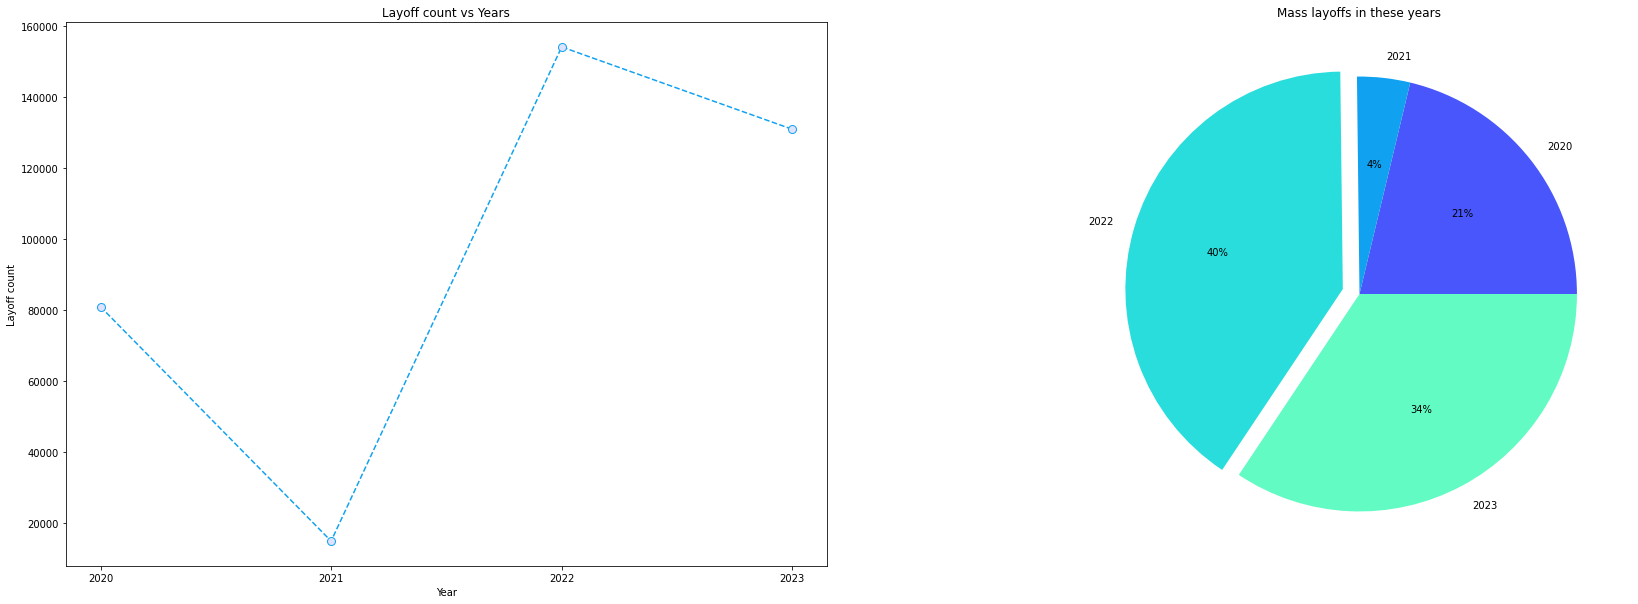

In [23]:
plt.figure(figsize=(30, 10))
laidOff_countYear = df.groupby('year_of_laidOff', as_index=False).sum()

plt.subplot(1, 2, 1)

plt.plot(laidOff_countYear['year_of_laidOff'], laidOff_countYear['Laid_Off_Count'], marker="o", linestyle='--', color='#10a2f0', markerfacecolor='#dfe2ff', markersize=8)
plt.xlabel('Year'), plt.ylabel('Layoff count')
plt.title("Layoff count vs Years")

plt.subplot(1, 2, 2)

plt.pie(data=laidOff_countYear, x=laidOff_countYear['Laid_Off_Count'], labels=laidOff_countYear['year_of_laidOff'], autopct='%.f%%',
        explode = [0, 0, 0.08, 0], colors=palette)
plt.title("Mass layoffs in these years")

plt.show()

Let's find out the top 10 countries with most layoffs using a pie chart

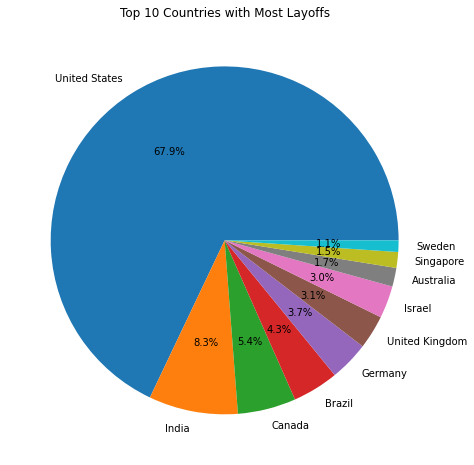

In [24]:
plt.figure(figsize=(28,8))
top_countries = df['Country'].value_counts().head(10)
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
plt.title('Top 10 Countries with Most Layoffs')
plt.show()

Let's check whether companies layed off 100% of their employees

In [25]:
layoff_100 = df.loc[df['Percentage'] == 1].dropna()
layoff_100

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,Year,year_of_laidOff
121,Openpay,Melbourne,Finance,83.0,1.0,2023-02-07 00:00:00,299.0000,Post-IPO,Australia,2023,2023
315,Britishvolt,London,Transportation,206.0,1.0,2023-01-17 00:00:00,2400.0000,Unknown,United Kingdom,2023,2023
674,Deliveroo Australia,Melbourne,Food,120.0,1.0,2022-11-15 00:00:00,1700.0000,Post-IPO,Australia,2022,2022
758,Planetly,Berlin,Other,200.0,1.0,2022-11-04 00:00:00,5.0000,Acquired,Germany,2022,2022
805,Fifth Season,Pittsburgh,Food,100.0,1.0,2022-10-28 00:00:00,35.0000,Series B,United States,2022,2022
862,Playdots,New York City,Consumer,65.0,1.0,2022-10-13 00:00:00,10.0000,Acquired,United States,2022,2022
926,Kitty Hawk,SF Bay Area,Aerospace,100.0,1.0,2022-09-21 00:00:00,1.0000,Unknown,United States,2022,2022
976,Simple Feast,Copenhagen,Food,150.0,1.0,2022-09-07 00:00:00,173.0000,Unknown,Denmark,2022,2022
1025,Reali,SF Bay Area,Real Estate,140.0,1.0,2022-08-24 00:00:00,117.0000,Series B,United States,2022,2022
1155,Metigy,Sydney,Marketing,75.0,1.0,2022-07-31 00:00:00,18.0000,Series B,Australia,2022,2022


In [26]:
layoff_100.shape

(37, 11)

It is surpring to see that their are around 36 companies with 100% layoff rate 

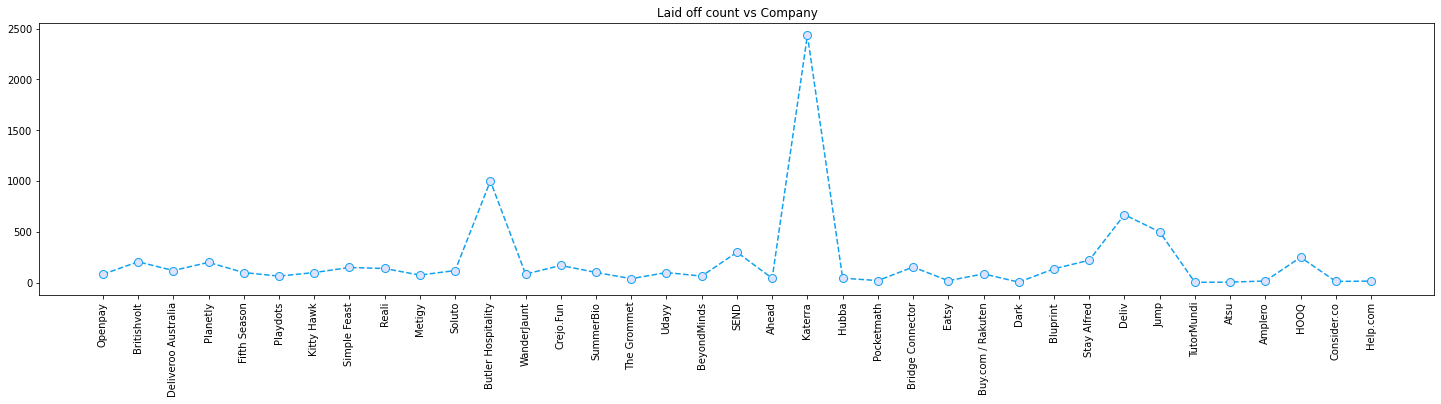

In [27]:
plt.figure(figsize=(25,5))
plt.plot('Company', 'Laid_Off_Count', marker="o", linestyle='--', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8, data=layoff_100)
plt.xticks(rotation = 90)
plt.title("Laid off count vs Company")
plt.show()

Visualizing the locations of the companies with 100% layoff rate in map

In [28]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="layoff_data")
locations = layoff_100['Location_HQ'].dropna()
latitudes = locations.apply(lambda loc: geolocator.geocode(loc).latitude)
longitudes = locations.apply(lambda loc: geolocator.geocode(loc).longitude)

fig = px.scatter_mapbox(layoff_100, lat=latitudes, lon=longitudes, 
                        hover_name='Location_HQ', hover_data=['Laid_Off_Count', 'Company'],
                        color='Laid_Off_Count', size='Laid_Off_Count',
                        color_continuous_scale=px.colors.sequential.Cividis,
                        zoom=1, center={'lat':10, 'lon':30},
                        height=400, width=1400,
                        mapbox_style='carto-positron')
fig.update_layout(title_text='Population of each cities', margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()


Dividing the dataframe into 4 groups according to their layoff count 35,35-75,75-160,160-11000

In [29]:
grp1 = df.loc[(df['Laid_Off_Count'] <= 35)]
grp2 = df.loc[(df['Laid_Off_Count'] > 35) & (df['Laid_Off_Count'] <= 75)]
grp3 = df.loc[(df['Laid_Off_Count'] > 75) & (df['Laid_Off_Count'] <= 160)]
grp4 = df.loc[(df['Laid_Off_Count'] > 160)]

Plotting a chart showing different types of industries in group 4(layoff>160)

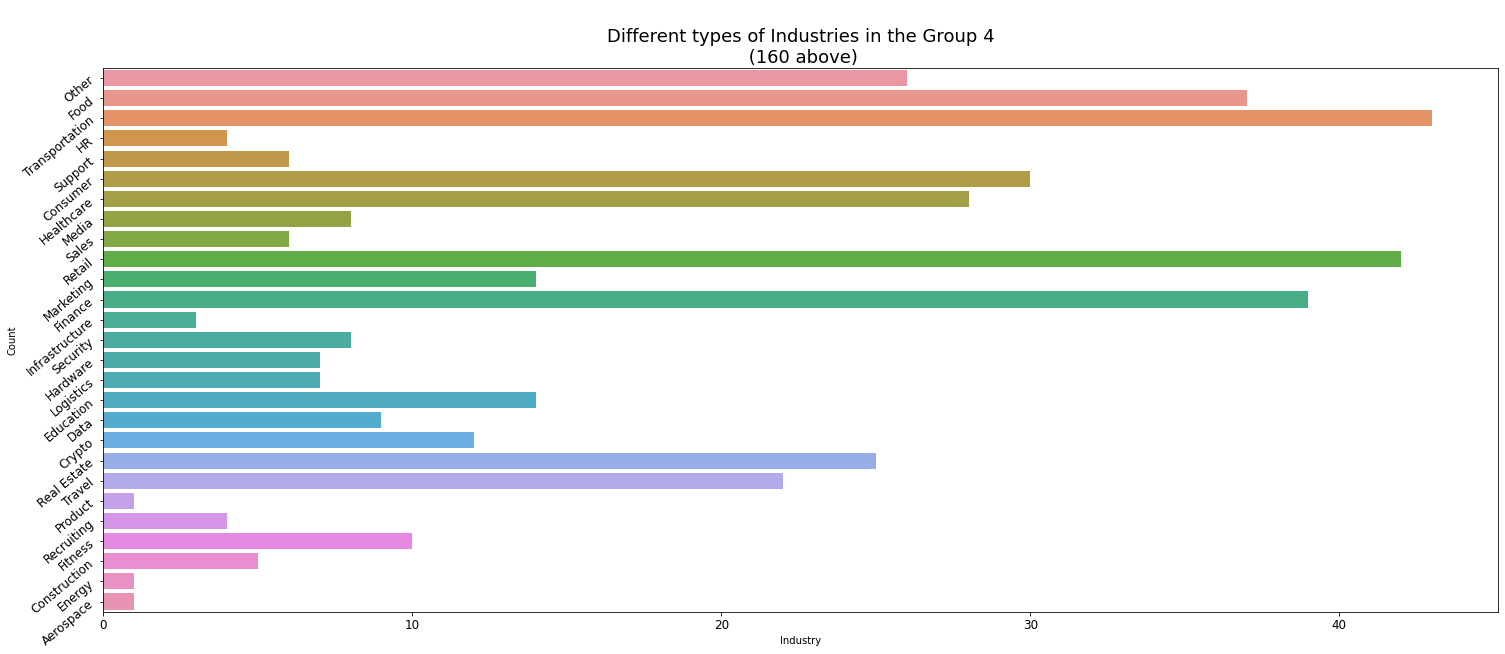

In [30]:
plt.figure(figsize=(25,10))
sns.countplot(y='Industry', data=grp4)
plt.xlabel('Industry'), plt.ylabel('Count')
plt.xticks(fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nDifferent types of Industries in the Group 4\n (160 above)", fontsize=18)

plt.show()

Plotting a table representing top 10 companies with most layoffs in group 4

In [31]:
top10_comp = grp4.sort_values('Laid_Off_Count', ascending=False)
top10_comp = top10_comp.head(10)
top10_comp

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,Year,year_of_laidOff
257,Google,SF Bay Area,Consumer,12000.0,0.06,2023-01-20 00:00:00,26.0,Post-IPO,United States,2023,2023
724,Meta,SF Bay Area,Consumer,11000.0,0.13,2022-11-09 00:00:00,26000.0,Post-IPO,United States,2022,2022
656,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16 00:00:00,108.0,Post-IPO,United States,2022,2022
289,Microsoft,Seattle,Other,10000.0,0.05,2023-01-18 00:00:00,1.0,Post-IPO,United States,2023,2023
16,Ericsson,Stockholm,Other,8500.0,0.08,2023-02-24 00:00:00,663.0,Post-IPO,Sweden,2023,2023
428,Amazon,Seattle,Retail,8000.0,0.02,2023-01-04 00:00:00,108.0,Post-IPO,United States,2023,2023
429,Salesforce,SF Bay Area,Sales,8000.0,0.10,2023-01-04 00:00:00,65.0,Post-IPO,United States,2023,2023
124,Dell,Austin,Hardware,6650.0,0.05,2023-02-06 00:00:00,NaN,Post-IPO,United States,2023,2023
186,Philips,Amsterdam,Healthcare,6000.0,0.13,2023-01-30 00:00:00,NaN,Post-IPO,Netherlands,2023,2023
1753,Booking.com,Amsterdam,Travel,4375.0,0.25,2020-07-30 00:00:00,NaN,Acquired,Netherlands,2020,2020


Plotting a chart showing layoff in top10 companies and theie locations

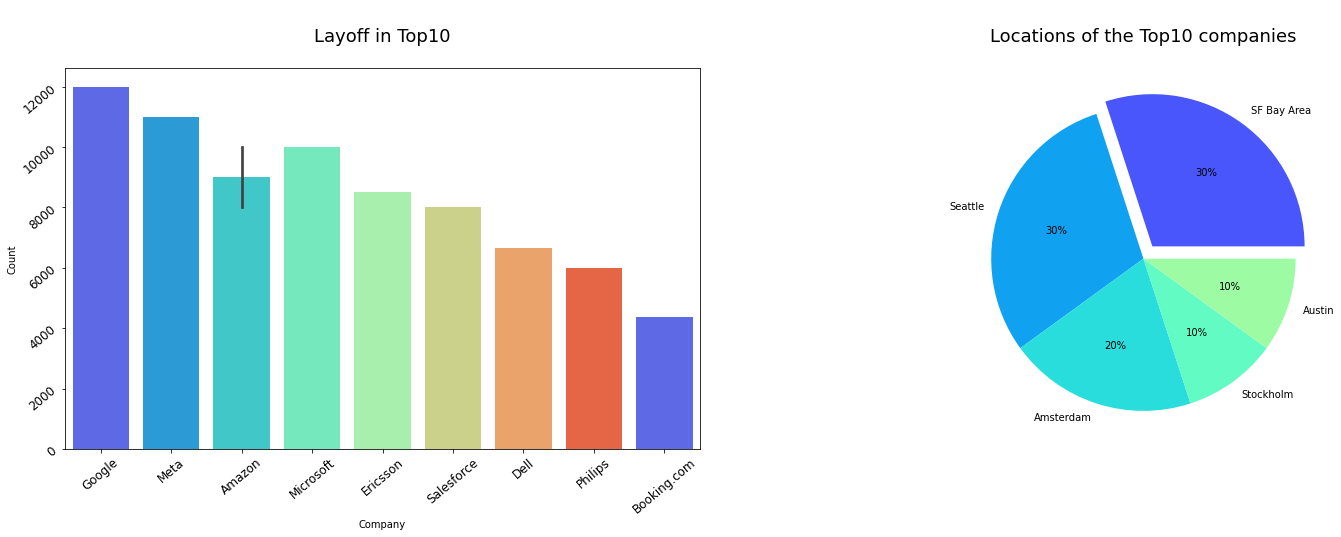

In [32]:
plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
sns.barplot(data=top10_comp, x=top10_comp['Company'], y=top10_comp['Laid_Off_Count'], palette=palette)
plt.xlabel('Company'), plt.ylabel('Count')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nLayoff in Top10\n", fontsize=18)

plt.subplot(1, 2, 2)
top10_comp_loca = top10_comp['Location_HQ'].value_counts()
loc_counts = top10_comp['Location_HQ'].value_counts()
explode = [0.1] + [0]*(len(loc_counts)-1)
plt.pie(data=top10_comp, x=top10_comp_loca.values, labels=top10_comp_loca.index, autopct='%.f%%',  explode = explode, colors=palette)
plt.title("\nLocations of the Top10 companies\n", fontsize=18)

plt.show()


Tpo 15 fund raised companies having layoffs

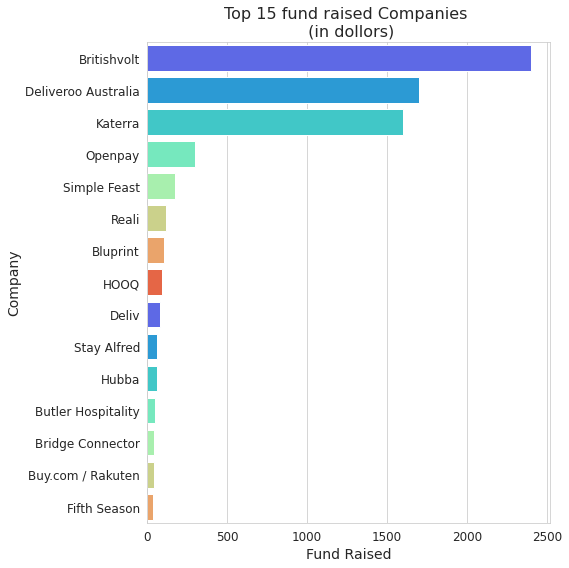

In [34]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 8))

top15_comp = layoff_100.sort_values(by='Funds_Raised', ascending=False)[:15]

sns.barplot(x='Funds_Raised', y='Company', data=top15_comp, palette=palette, ci=None)

plt.xlabel('Fund Raised', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.xticks(fontsize=12), plt.yticks(fontsize=12)
plt.title("Top 15 fund raised Companies \n (in dollors)", fontsize=16)

plt.tight_layout()
plt.show()


# **CONCLUSION**

Based on the analysis of the 2023 layoffs data, several insights can be derived.

  Firstly, we found that the overall number of layoffs has increased compared to the previous years, with the highest number of layoffs occurring in the Technology sector.
  Secondly, we identified several companies that have had a high number of layoffs, including Amazon, Google, and Microsoft. These companies are significant players in the tech industry, and their layoffs can have a ripple effect on the economy.
  Thirdly, we observed that the most affected regions by the layoffs are United State,India, Canada.
  Finally, we used geographic visualization to map the location of the laid-off employees, revealing clusters of layoffs in several cities. These visualizations can tigger many thoughts for different people. Whatever is your thoughts shoutout.

  Follow me on 
  
  LinkedIn : https://www.linkedin.com/in/pranav-lal-v-r-3320191b2
  
  Github :https://github.com/Pranavla

  Medium : https://medium.com/@pranavlal568
